In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
csv_files=["C:\My Setups\Singapore Flat Resale Pricing\ResaleFlatPricesBasedonApprovalDate19901999.csv",
           "C:\My Setups\Singapore Flat Resale Pricing\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv",
           "C:\My Setups\Singapore Flat Resale Pricing\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv",
           "C:\My Setups\Singapore Flat Resale Pricing\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv",
           "C:\My Setups\Singapore Flat Resale Pricing\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"]
df=[]

for files in csv_files:
    df1=pd.read_csv(files)
    df.append(df1)

combined_df=pd.concat(df,ignore_index=True)

combined_df.to_csv("Singapore_Resale_Flat_Prices.csv",index=False)

print("File created successfully")

File created successfully


In [7]:
df=pd.read_csv("C:\My Setups\Singapore Flat Resale Pricing\Singapore_Resale_Flat_Prices.csv")
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
935981,2024-09,YISHUN,5 ROOM,865,YISHUN ST 81,07 TO 09,122.0,Improved,1988,738000.0,62 years 07 months
935982,2024-09,YISHUN,EXECUTIVE,792,YISHUN RING RD,07 TO 09,142.0,Apartment,1987,818888.0,62 years
935983,2024-09,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,850000.0,62 years 10 months
935984,2024-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,01 TO 03,147.0,Apartment,1987,770000.0,62 years 03 months


In [8]:
df.shape

(935986, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935986 entries, 0 to 935985
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                935986 non-null  object 
 1   town                 935986 non-null  object 
 2   flat_type            935986 non-null  object 
 3   block                935986 non-null  object 
 4   street_name          935986 non-null  object 
 5   storey_range         935986 non-null  object 
 6   floor_area_sqm       935986 non-null  float64
 7   flat_model           935986 non-null  object 
 8   lease_commence_date  935986 non-null  int64  
 9   resale_price         935986 non-null  float64
 10  remaining_lease      226936 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.6+ MB


In [10]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,935986.000000,935986.000000,9.359860e+05
mean,95.687669,1988.368369,3.235729e+05
std,25.810344,10.755733,1.730808e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.950000e+05
50%,93.000000,1986.000000,3.000000e+05
75%,113.000000,1996.000000,4.200000e+05
max,366.700000,2020.000000,1.588000e+06


In [11]:
df["month"]=pd.to_datetime(df["month"])

In [12]:
df["resale_year"]=df["month"].dt.year
df["resale_month"]=df["month"].dt.month

In [13]:
df[["storey_low","storey_high"]]=df["storey_range"].str.split("TO",expand=True)
df["lease_age"]=df["resale_year"]-df["lease_commence_date"]

In [14]:
df.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
resale_year                     int32
resale_month                    int32
storey_low                     object
storey_high                    object
lease_age                       int64
dtype: object

In [15]:
df["storey_low"]=pd.to_numeric(df["storey_low"],errors="coerce")
df["storey_high"]=pd.to_numeric(df["storey_high"],errors="coerce")
df["resale_year"]=pd.to_numeric(df["resale_year"],errors="coerce")
df["resale_month"]=pd.to_numeric(df["resale_month"],errors="coerce")

In [16]:
df["block"]=pd.to_numeric(df["block"],errors="coerce")

In [17]:
df.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                         float64
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                object
resale_year                     int32
resale_month                    int32
storey_low                      int64
storey_high                     int64
lease_age                       int64
dtype: object

In [18]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                  128060
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
resale_year                 0
resale_month                0
storey_low                  0
storey_high                 0
lease_age                   0
dtype: int64

In [19]:
df["block"]=df["block"].fillna(df["block"].mode()[0])

In [20]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
resale_year                 0
resale_month                0
storey_low                  0
storey_high                 0
lease_age                   0
dtype: int64

In [21]:
df["remaining_lease"] = df["remaining_lease"].astype(str)
df["remaining_lease"] = df["remaining_lease"].fillna('0')
df["remaining_lease"] = pd.to_numeric(df["remaining_lease"].str.split(" ").str[0], errors='coerce')
df["remaining_lease"] = df["remaining_lease"].fillna(0).astype(int)

In [22]:
df["remaining_lease"].fillna(99-(df["resale_year"]-df["lease_commence_date"]),inplace=True)
mask=df["remaining_lease"]<99
df_filtered=df[mask]

In [23]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
resale_year            0
resale_month           0
storey_low             0
storey_high            0
lease_age              0
dtype: int64

In [24]:
df["flat_model"]=df["flat_model"].str.upper()

In [25]:
df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [26]:
df["flat_type"]=df["flat_type"].str.replace("MULTI-GENERATION","MULTI GENERATION")

In [27]:
df["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [28]:
df.duplicated().sum()

2587

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

In [31]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
resale_year            0
resale_month           0
storey_low             0
storey_high            0
lease_age              0
dtype: int64

In [32]:
df.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                         float64
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
remaining_lease                 int32
resale_year                     int32
resale_month                    int32
storey_low                      int64
storey_high                     int64
lease_age                       int64
dtype: object

In [34]:
df.sample(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_low,storey_high,lease_age
752574,2017-05-01,BUKIT MERAH,4 ROOM,2.0,TELOK BLANGAH ST 31,04 TO 06,93.0,PREMIUM APARTMENT,2013,700000.0,95,2017,5,4,6,4
841557,2021-04-01,CLEMENTI,4 ROOM,601.0,CLEMENTI WEST ST 1,10 TO 12,92.0,NEW GENERATION,1979,425000.0,57,2021,4,10,12,42


In [453]:
num_columns=["floor_area_sqm","resale_price","block"]

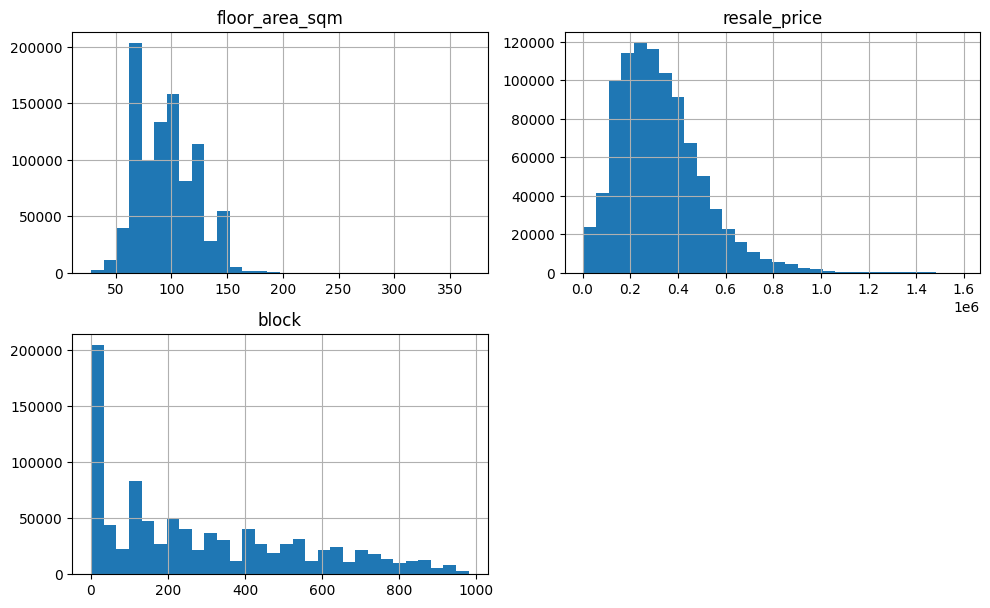

In [454]:
#histplot-distribution of data
df[num_columns].hist(figsize=(10,15),bins=30,layout=(5,2))
plt.tight_layout()
plt.show()

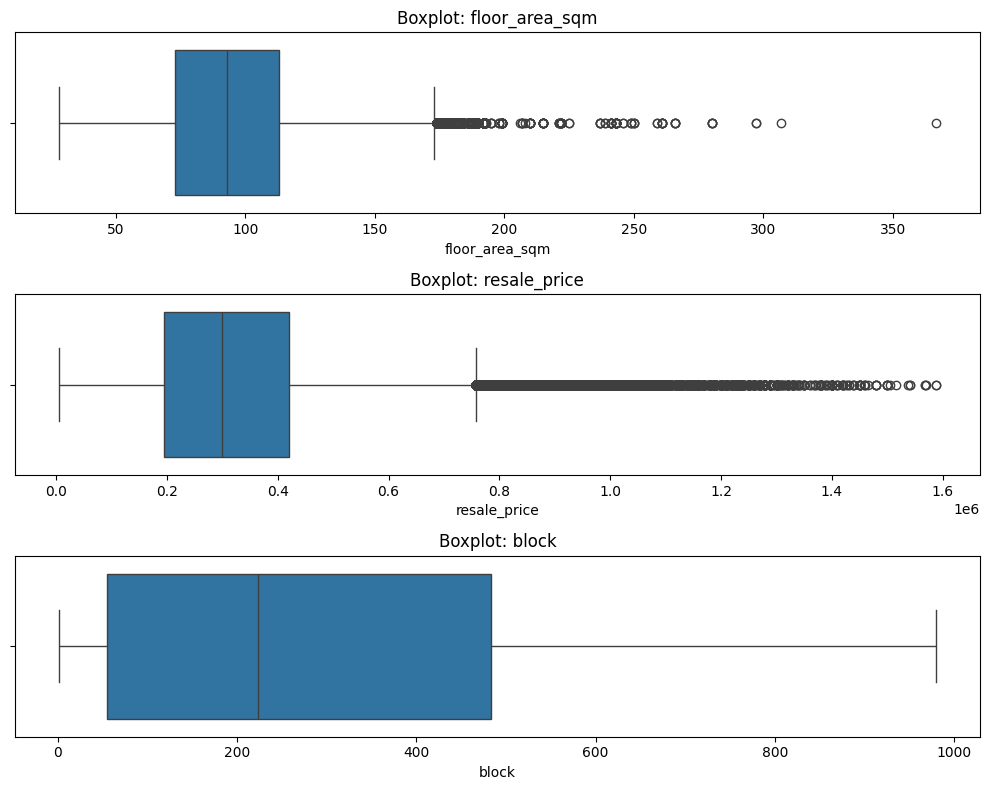

In [455]:
fig,axes=plt.subplots(3,1,figsize=(10,8))
axes=axes.flatten()
for ax,column in zip(axes,num_columns):
    sb.boxplot(x=df[column],ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [456]:
def check_skew(df,num_columns):
    skewness_i={}
    for i in num_columns:
        skewness=df[i].skew()
        if skewness>0.5:
            skew_type="Positively Skewed"
        elif skewness<-0.5:
            skew_type="Negatively skewed"
        else:
            skew_type="Symmetric"
        
        skewness_i[i]={
            "skewness_value":skewness,
            "skew Type":skew_type
        }
    return pd.DataFrame(skewness_i)

In [457]:
check_skew(df,num_columns)

,floor_area_sqm,resale_price,block
skewness_value,0.366277,0.963389,0.690117
skew Type,Symmetric,Positively Skewed,Positively Skewed


In [458]:
df["resale_price_log"]=np.log(df["resale_price"])
df["block_log"]=np.log(df["block"])

In [459]:
print("log",df["resale_price_log"].skew())
print("log",df["block_log"].skew())

log -0.9109403730470671
log -1.1048611008487055


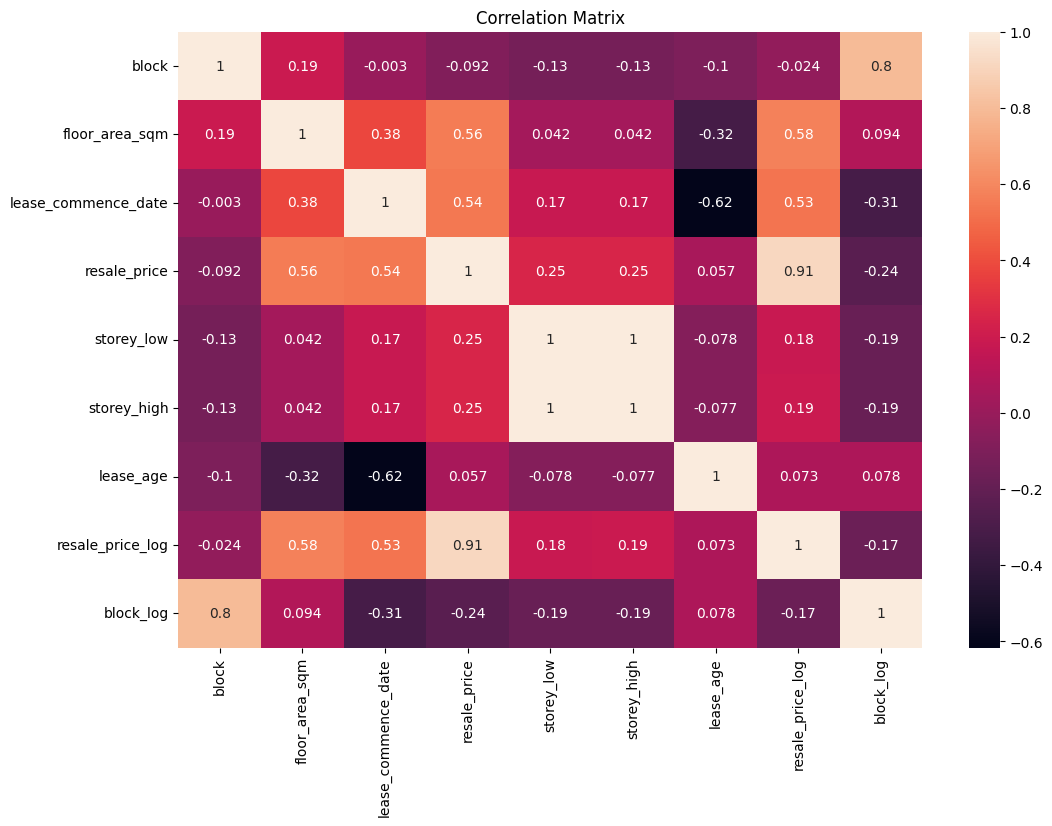

In [463]:
numeric_c=df.select_dtypes(include=["float64","int64"]).columns
correlation_matrix=df[numeric_c].corr()
plt.figure(figsize=(12,8))
sb.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

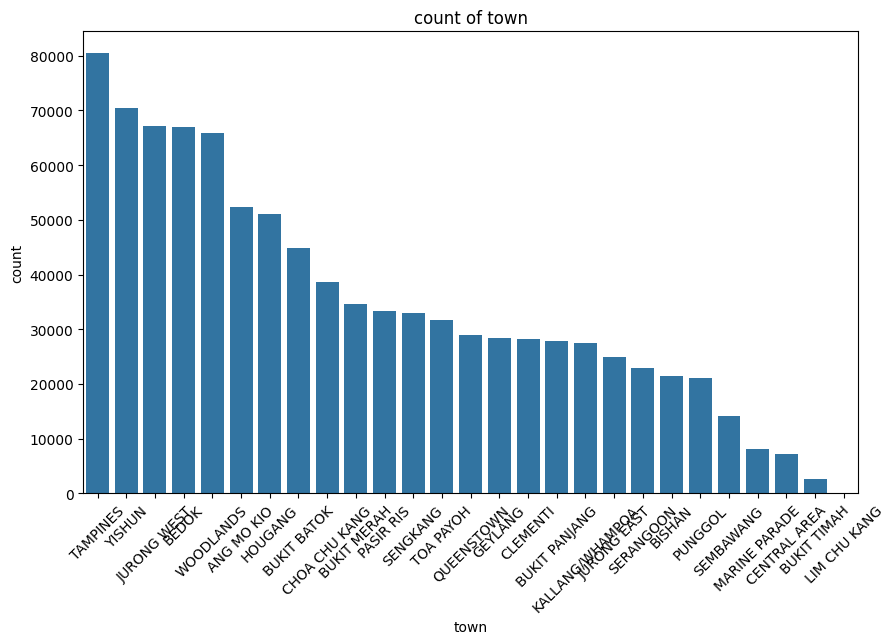

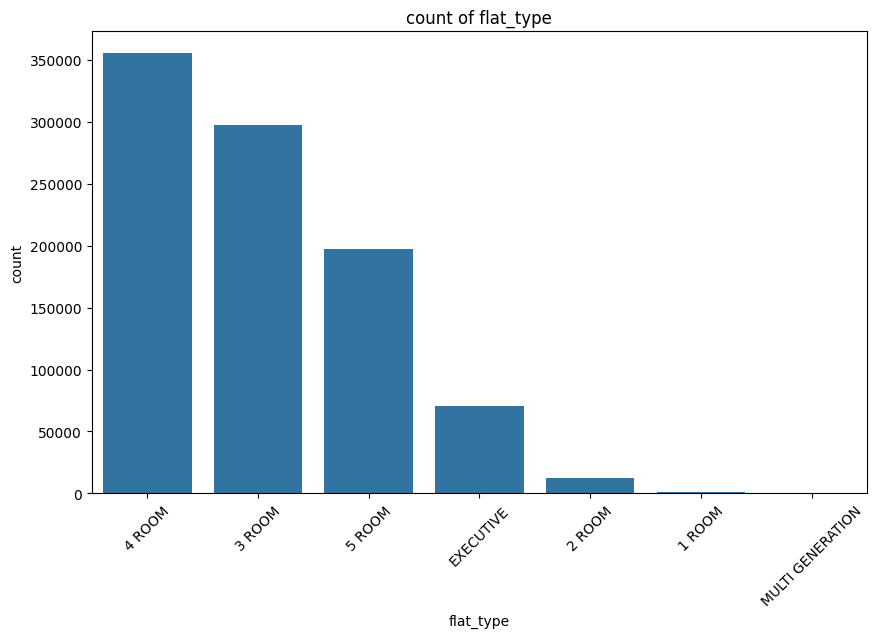

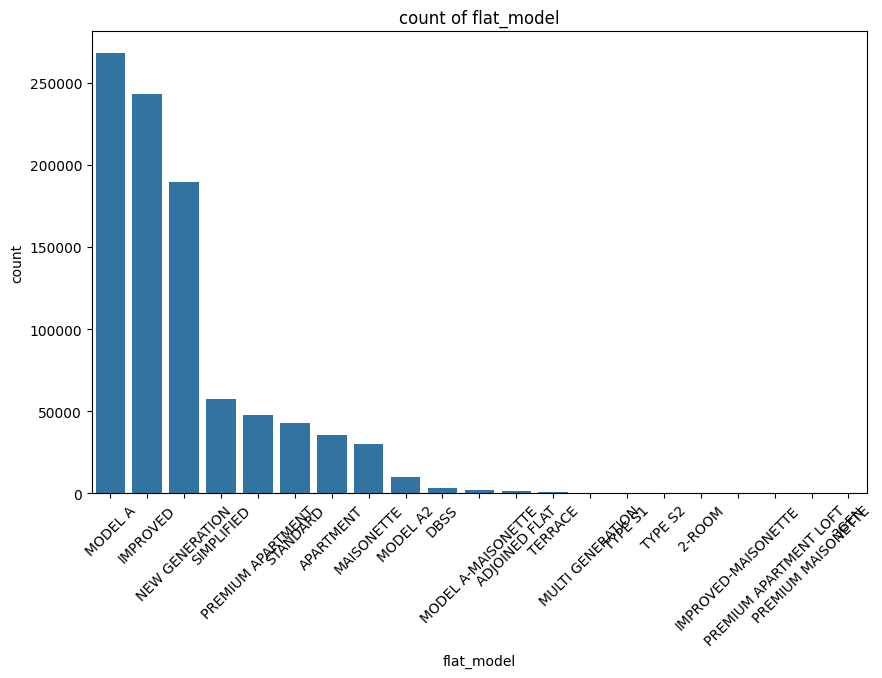

In [468]:
c_c=["town","flat_type","flat_model"]
for i in c_c:
    plt.figure(figsize=(10,6))
    sb.countplot(data=df,x=i,order=df[i].value_counts().index)
    plt.title(f"count of {i}")
    plt.xticks(rotation=45)
    plt.show()

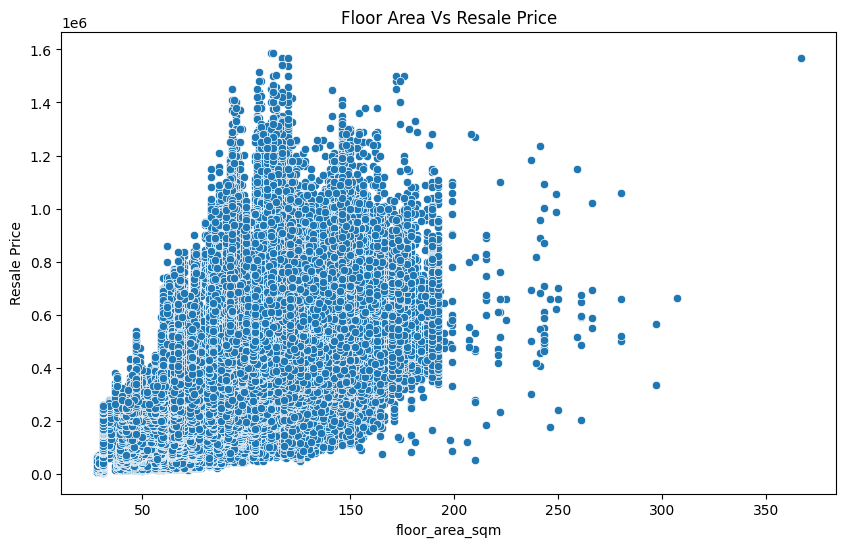

In [469]:
plt.figure(figsize=(10,6))
sb.scatterplot(data=df,x="floor_area_sqm",y="resale_price")
plt.title("Floor Area Vs Resale Price")
plt.ylabel("Resale Price")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

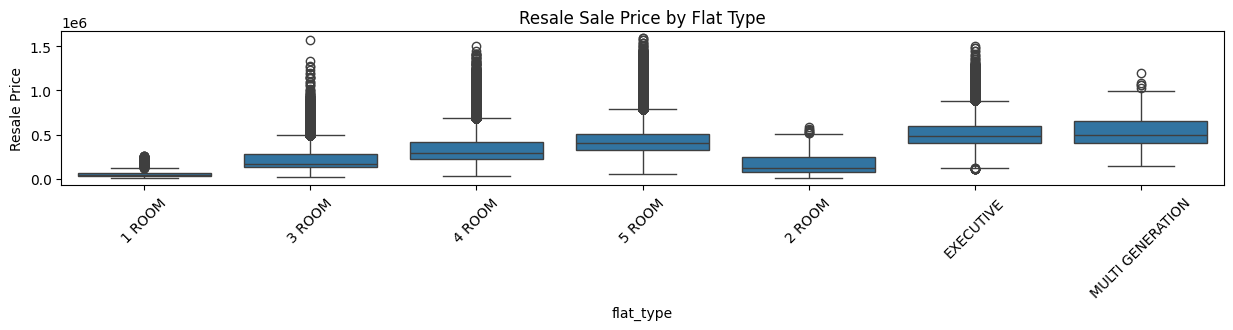

In [471]:
plt.figure(figsize=(15,2))
sb.boxplot(data=df,x="flat_type",y="resale_price")
plt.title("Resale Sale Price by Flat Type")
plt.xticks(rotation=45)
plt.ylabel("Resale Price")
plt.show

In [361]:
num_columns_treated=["floor_area_sqm","resale_price_log","block_log"]

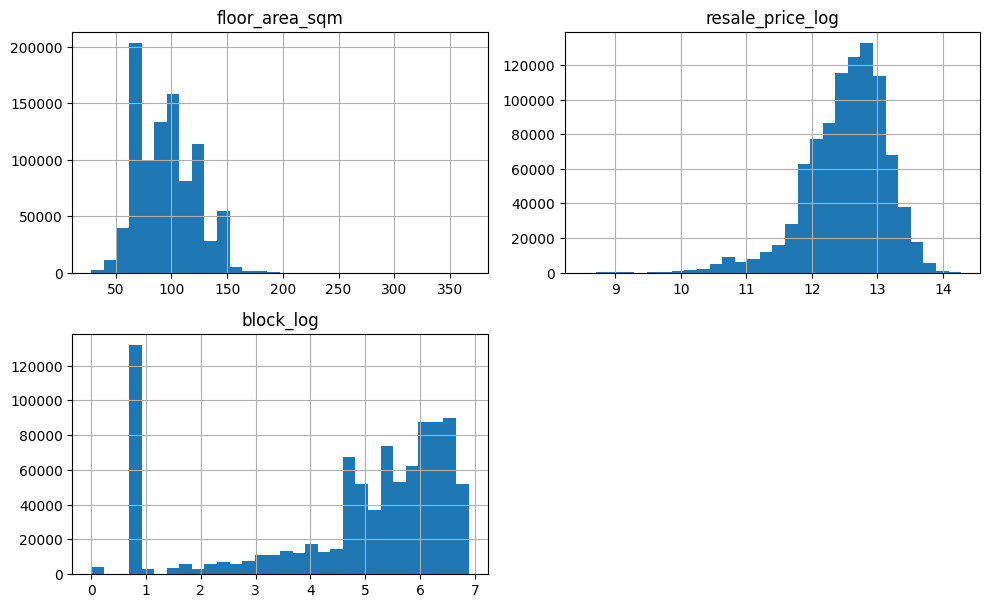

In [362]:
#histplot-distribution of data
df[num_columns_treated].hist(figsize=(10,15),bins=30,layout=(5,2))
plt.tight_layout()
plt.show()

In [363]:
def outliers(df,column):
    outlier={}
    for i in column:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR

        df[i]=df[i].clip(lower=lower_bound,upper=upper_bound)
        outlier[i]=(lower_bound,upper_bound)
    return outlier

In [364]:
outliers(df,num_columns)

{'floor_area_sqm': (13.0, 173.0),
 'resale_price': (-142500.0, 757500.0),
 'block': (-587.0, 1125.0)}

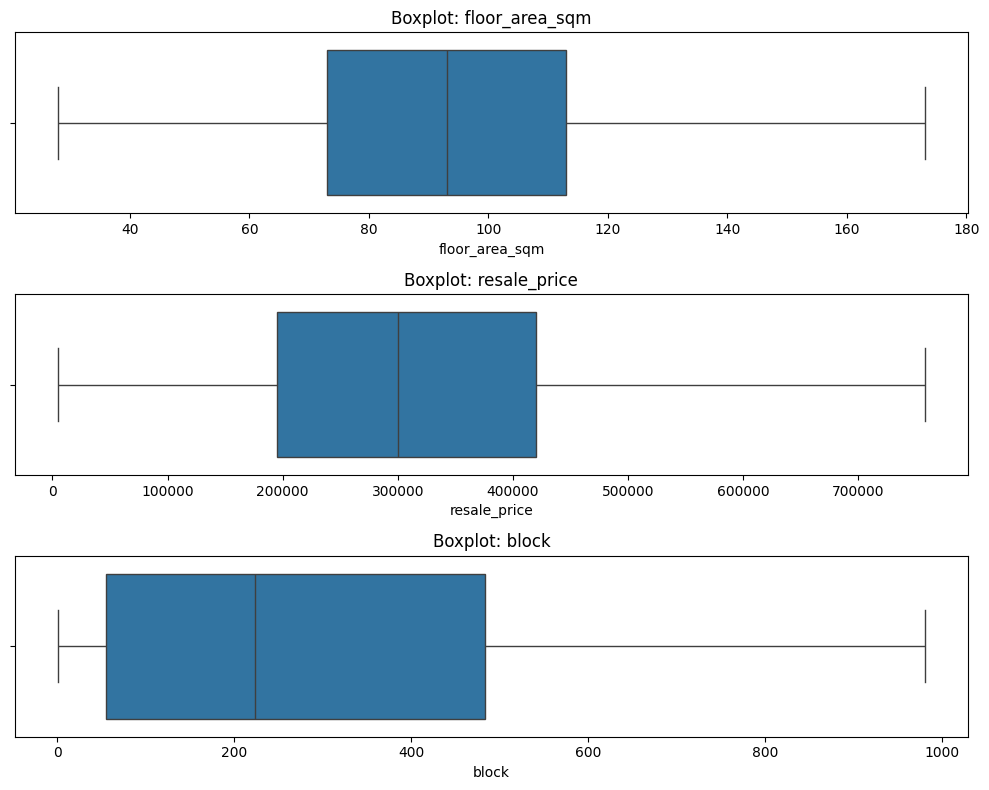

In [365]:
fig,axes=plt.subplots(3,1,figsize=(10,8))
axes=axes.flatten()
for ax,column in zip(axes,num_columns):
    sb.boxplot(x=df[column],ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [366]:
num_int=["resale_year","resale_month","lease_commence_date","storey_low","storey_high"]

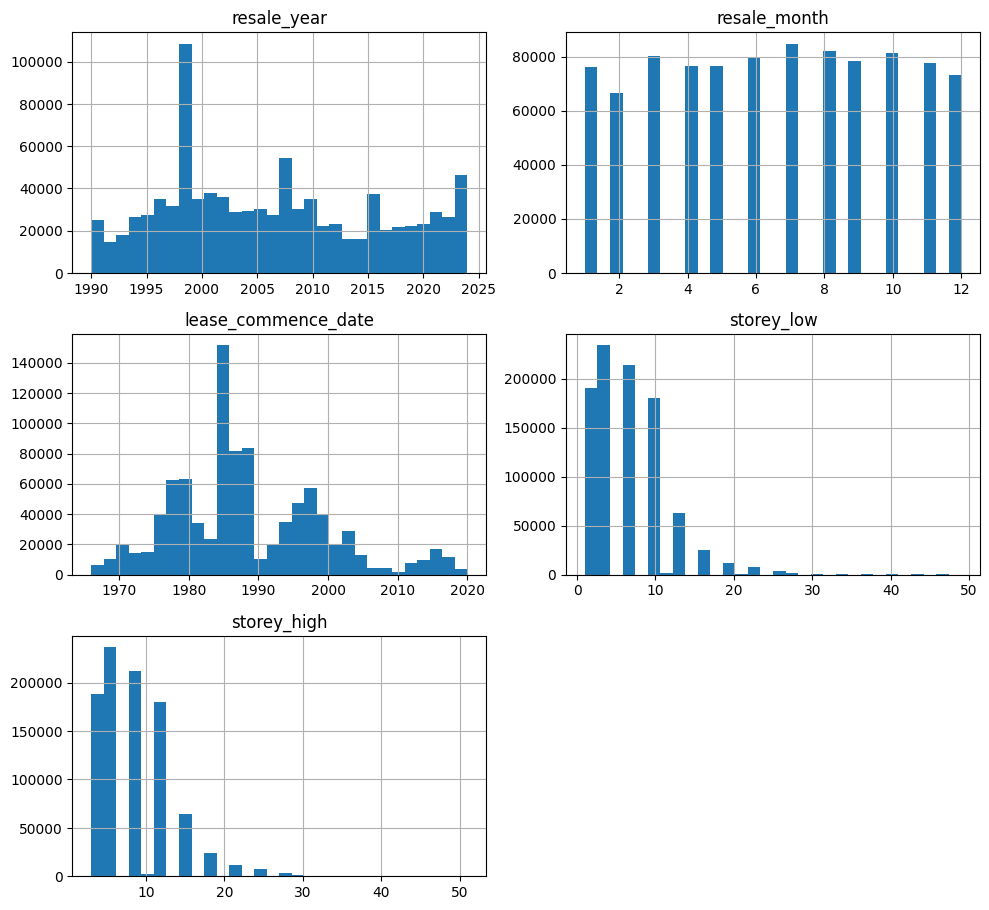

In [367]:
#histplot-distribution of data
df[num_int].hist(figsize=(10,15),bins=30,layout=(5,2))
plt.tight_layout()
plt.show()

In [368]:
def check_skew(df,num_columns):
    skewness_i={}
    for i in num_columns:
        skewness=df[i].skew()
        if skewness>0.5:
            skew_type="Positively Skewed"
        elif skewness<-0.5:
            skew_type="Negatively skewed"
        else:
            skew_type="Symmetric"
        
        skewness_i[i]={
            "skewness_value":skewness,
            "skew Type":skew_type
        }
    return pd.DataFrame(skewness_i)

In [369]:
check_skew(df,num_int)

,resale_year,resale_month,lease_commence_date,storey_low,storey_high
skewness_value,0.292123,-0.033676,0.655871,1.358512,1.35916
skew Type,Symmetric,Symmetric,Positively Skewed,Positively Skewed,Positively Skewed


In [370]:
df["lease_commence_date_log"]=np.log(df["lease_commence_date"])
df["storey_low_log"]=np.log(df["storey_low"])
df["storey_high_log"]=np.log(df["storey_high"])
# df["remaining_lease_log"]=np.log(df["remaining_lease"])

In [371]:
print("log",df["lease_commence_date_log"].skew())
print("log",df["storey_low_log"].skew())
print("log",df["storey_high_log"].skew())
# print("log",df["remaining_lease_log"].skew())

log 0.6411540500091978
log -0.6649019949385953
log -0.2275371898952706


In [372]:
num_int_treated=["lease_commence_date_log","storey_low_log","storey_high_log"]

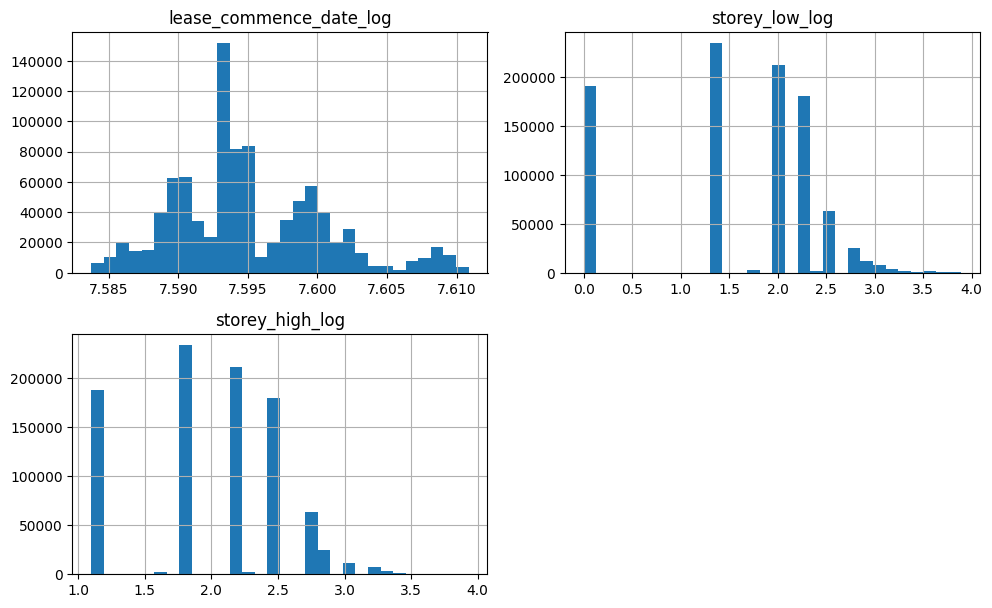

In [373]:
#histplot-distribution of data
df[num_int_treated].hist(figsize=(10,15),bins=30,layout=(5,2))
plt.tight_layout()
plt.show()

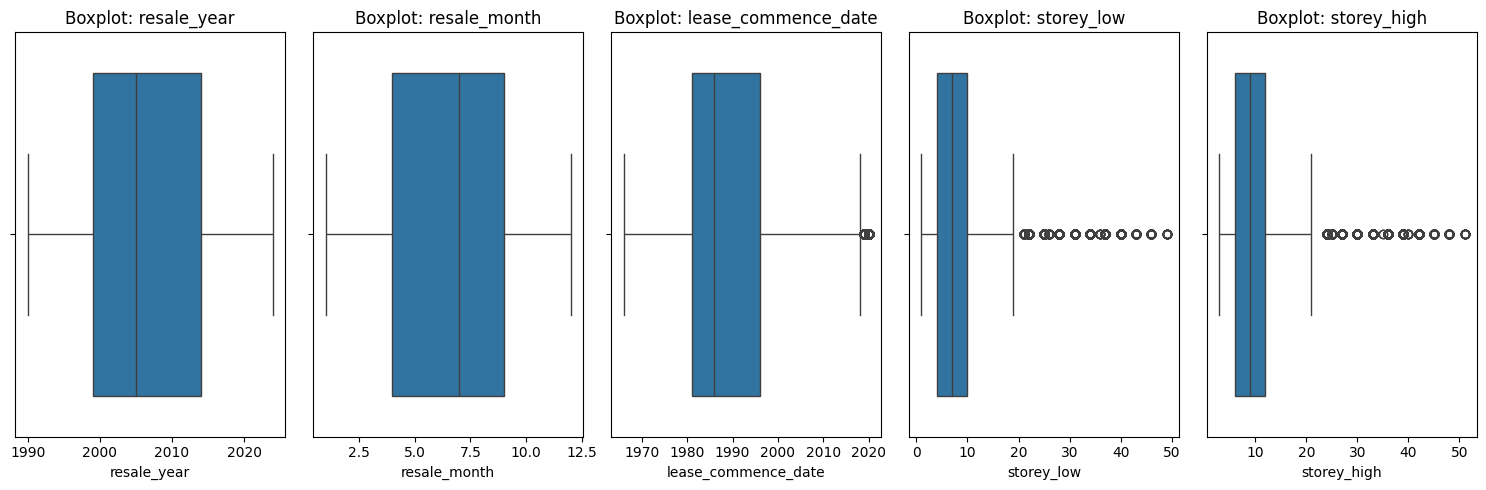

In [374]:
fig,axes=plt.subplots(nrows=1,ncols=len(num_int),figsize=(15,5))

axes = axes.flatten()

for ax,column in zip(axes, num_int):
    sb.boxplot(x=df[column],ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [375]:
def outliers(df,column):
    outlier={}
    for i in column:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR

        df[i]=df[i].clip(lower=lower_bound,upper=upper_bound)
        outlier[i]=(lower_bound,upper_bound)
    return outlier

In [376]:
outliers(df,num_int)

{'resale_year': (1976.5, 2036.5),
 'resale_month': (-3.5, 16.5),
 'lease_commence_date': (1958.5, 2018.5),
 'storey_low': (-5.0, 19.0),
 'storey_high': (-3.0, 21.0)}

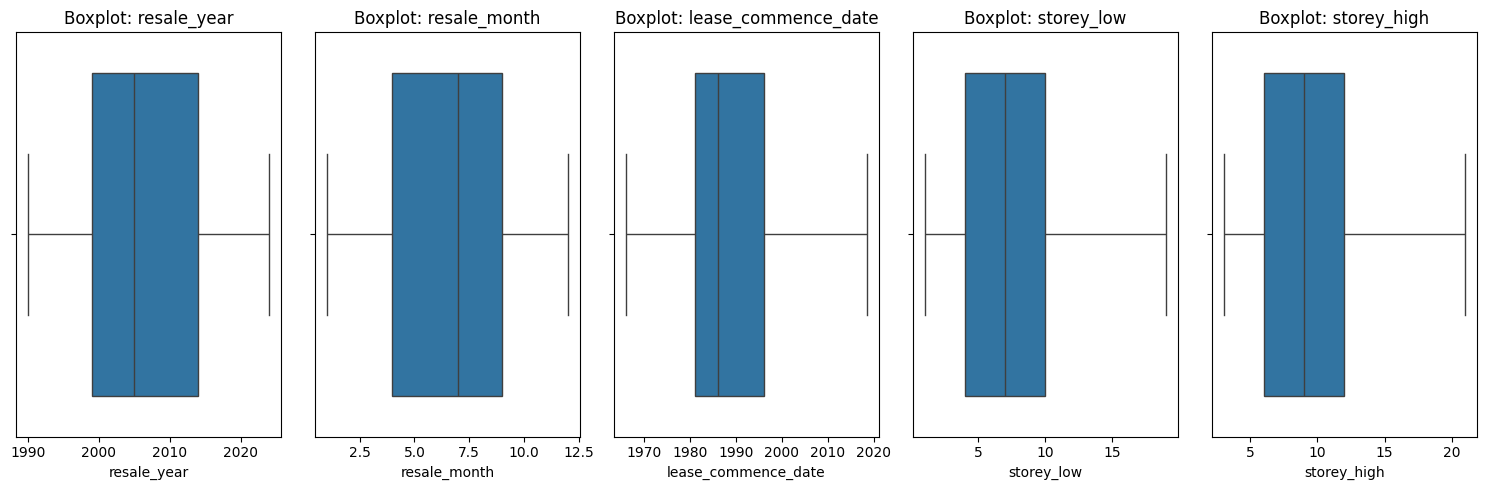

In [377]:
fig,axes=plt.subplots(nrows=1,ncols=len(num_int),figsize=(15,5))

axes = axes.flatten()

for ax,column in zip(axes, num_int):
    sb.boxplot(x=df[column],ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In [381]:
df=df.drop(columns=["month"])

In [382]:
df.sample(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_low,storey_high,lease_age,resale_price_log,block_log,lease_commence_date_log,storey_low_log,storey_high_log
213061,WOODLANDS,3 ROOM,316.0,WOODLANDS ST 31,01 TO 03,73.0,MODEL A,1993.0,135000.0,0,1998,9,1,3,5,11.813030,5.755742,7.597396,0.0,1.098612
734350,TOA PAYOH,3 ROOM,119.0,POTONG PASIR AVE 1,01 TO 03,67.0,NEW GENERATION,1984.0,308000.0,67,2016,5,1,3,32,12.637855,4.779123,7.592870,0.0,1.098612


In [422]:
df["lease_age"].max()

58

In [379]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'resale_year', 'resale_month', 'storey_low',
       'storey_high', 'lease_age', 'resale_price_log', 'block_log',
       'lease_commence_date_log', 'storey_low_log', 'storey_high_log'],
      dtype='object')

In [390]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X=df[["town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
      "storey_low_log","storey_high_log"]]
y=df["resale_price_log"]

le_town=LabelEncoder()
X["town"] = le_town.fit_transform(X["town"])

le_flat=LabelEncoder()
X["flat_type"] = le_flat.fit_transform(X["flat_type"])

le_flat_model=LabelEncoder()
X["flat_model"] = le_flat_model.fit_transform(X["flat_model"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model_regressor=RandomForestRegressor(n_estimators=50,max_depth=10,random_state=42)
model_regressor.fit(X_train,y_train)

y_prediction_rf=model_regressor.predict(X_test)

mse_rf=mean_squared_error(y_test,y_prediction_rf)
mae_rf=mean_absolute_error(y_test,y_prediction_rf)
r2_rf=r2_score(y_test,y_prediction_rf)

print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R^2 Score: {r2_rf}")

Mean Squared Error (MSE): 0.019525308505140847
Mean Absolute Error (MAE): 0.10503875321494271
R^2 Score: 0.9479186211070285


In [391]:
input_data=pd.DataFrame({
    "town":["WOODLANDS"],
    "flat_type":["3 ROOM"],
    "floor_area_sqm":[73.0],
    "flat_model":["MODEL A"],
    "remaining_lease":[0],
    "resale_year":[1998],
    "resale_month":[9],
    "lease_age":[5],
    "block_log":[5.755742],
    "lease_commence_date_log":[7.597396],
    "storey_low_log":[1],
    "storey_high_log":[3]   
})
input_data["town"]=le_town.transform(input_data["town"])
input_data["flat_type"]=le_flat.transform(input_data["flat_type"])
input_data["flat_model"]=le_flat_model.transform(input_data["flat_model"])

X_sample=input_data[[
    "town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
    "storey_low_log","storey_high_log"
]]

prediction=model_regressor.predict(X_sample)
print(np.exp(prediction[0]))

143782.9760918077


In [386]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X=df[["town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
      "storey_low_log","storey_high_log"]]
y=df["resale_price_log"]

le_town=LabelEncoder()
X["town"] = le_town.fit_transform(X["town"])

le_flat=LabelEncoder()
X["flat_type"] = le_flat.fit_transform(X["flat_type"])

le_flat_model=LabelEncoder()
X["flat_model"] = le_flat_model.fit_transform(X["flat_model"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model_lr=LinearRegression()

model_lr.fit(X_train,y_train)

y_prediction_lr=model_lr.predict(X_test)

mse_lr=mean_squared_error(y_test,y_prediction_lr)
mae_lr=mean_absolute_error(y_test,y_prediction_lr)
r2_lr=r2_score(y_test,y_prediction_lr)

print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"R^2 Score: {r2_lr}")

Mean Squared Error (MSE): 0.0842142864125835
Mean Absolute Error (MAE): 0.21880980976873157
R^2 Score: 0.7753686627947421


In [387]:
input_data=pd.DataFrame({
    "town":["WOODLANDS"],
    "flat_type":["3 ROOM"],
    "floor_area_sqm":[73.0],
    "flat_model":["MODEL A"],
    "remaining_lease":[0],
    "resale_year":[1998],
    "resale_month":[9],
    "lease_age":[5],
    "block_log":[5.755742],
    "lease_commence_date_log":[7.597396],
    "storey_low_log":[1],
    "storey_high_log":[3]   
})
input_data["town"]=le_town.transform(input_data["town"])
input_data["flat_type"]=le_flat.transform(input_data["flat_type"])
input_data["flat_model"]=le_flat_model.transform(input_data["flat_model"])

X_sample=input_data[[
    "town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
    "storey_low_log","storey_high_log"
]]

prediction=model_lr.predict(X_sample)
print(np.exp(prediction[0]))

217357.60757485547


In [411]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X=df[["town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
      "storey_low_log","storey_high_log"]]
y=df["resale_price_log"]

le_town=LabelEncoder()
X["town"] = le_town.fit_transform(X["town"])

le_flat=LabelEncoder()
X["flat_type"] = le_flat.fit_transform(X["flat_type"])

le_flat_model=LabelEncoder()
X["flat_model"] = le_flat_model.fit_transform(X["flat_model"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model_dt=DecisionTreeRegressor(random_state=42)

model_dt.fit(X_train,y_train)

y_prediction_dt=model_dt.predict(X_test)

mse_dt=mean_squared_error(y_test,y_prediction_dt)
mae_dt=mean_absolute_error(y_test,y_prediction_dt)
r2_dt=r2_score(y_test,y_prediction_dt)

print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R^2 Score: {r2_dt}")

Mean Squared Error (MSE): 0.011312260685349358
Mean Absolute Error (MAE): 0.07134268275633919
R^2 Score: 0.969825924402955


In [417]:
import pickle

In [423]:
with open('DecisionTreeRegressor.pkl','wb') as files:
    pickle.dump(model_dt,files)

with open('le_town.pkl','wb') as files:
    pickle.dump(le_town,files)

with open('le_flat.pkl','wb') as files:
    pickle.dump(le_flat,files)
    
with open('le_flat_model.pkl','wb') as files:
    pickle.dump(le_flat_model,files)

In [405]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X=df[["town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
      "storey_low_log","storey_high_log"]]
y=df["resale_price_log"]

le_town=LabelEncoder()
X["town"] = le_town.fit_transform(X["town"])

le_flat=LabelEncoder()
X["flat_type"] = le_flat.fit_transform(X["flat_type"])

le_flat_model=LabelEncoder()
X["flat_model"] = le_flat_model.fit_transform(X["flat_model"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model_dt=DecisionTreeRegressor(random_state=42)

# model_dt.fit(X_train,y_train)

param_grid_dt={
    "max_depth":[5, 10, 15, 20, 25],
    "min_samples_split":[2, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5, 10],
    "criterion":["squared_error","friedman_mse"]
}


grid_search_dt=GridSearchCV(estimator=model_dt,
                            param_grid=param_grid_dt,
                            cv=5)

grid_search_dt.fit(X_train,y_train)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

best_dt_model=grid_search_dt.best_estimator_

y_prediction_best_dt_model=best_dt_model.predict(X_test)

mse_dt=mean_squared_error(y_test,y_prediction_best_dt_model)
mae_dt=mean_absolute_error(y_test,y_prediction_best_dt_model)
r2_dt=r2_score(y_test,y_prediction_best_dt_model)

print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R^2 Score: {r2_dt}")

Best Parameters for Decision Tree: {'criterion': 'friedman_mse', 'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 20}
Mean Squared Error (MSE): 0.008247342430640035
Mean Absolute Error (MAE): 0.062432380293880145
R^2 Score: 0.9780012200126236


In [527]:
df["lease_commence_date"].min()

1966

In [524]:
df.sample(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_low,storey_high,lease_age,resale_price_log,block_log
566106,2009-01-01,ANG MO KIO,3 ROOM,513.0,ANG MO KIO AVE 8,01 TO 03,67.0,NEW GENERATION,1984,227000.0,0,2009,1,1,3,25,12.332705,6.240276


In [407]:
df.sample(1)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_low,storey_high,lease_age,resale_price_log,block_log,lease_commence_date_log,storey_low_log,storey_high_log
802533,YISHUN,4 ROOM,868.0,YISHUN ST 81,04 TO 06,84.0,SIMPLIFIED,1987.0,280888.0,67,2019,8,4,6,32,12.545711,6.766192,7.594381,1.386294,1.791759


In [424]:
df.sample(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_low,storey_high,lease_age,resale_price_log,block_log,lease_commence_date_log,storey_low_log,storey_high_log
552884,GEYLANG,4 ROOM,124.0,GEYLANG EAST AVE 1,04 TO 06,104.0,MODEL A,1983.0,353000.0,0,2008,7,4,6,25,12.774223,4.820282,7.592366,1.386294,1.791759
574319,WOODLANDS,3 ROOM,342.0,WOODLANDS AVE 1,01 TO 03,69.0,NEW GENERATION,1995.0,215000.0,0,2009,4,1,3,14,12.278393,5.834811,7.598399,0.000000,1.098612


In [416]:
input_data=pd.DataFrame({
    "town":["YISHUN"],
    "flat_type":["4 ROOM"],
    "floor_area_sqm":[84.0],
    "flat_model":["SIMPLIFIED"],
    "remaining_lease":[67],
    "resale_year":[2019],
    "resale_month":[8],
    "lease_age":[32],
    "block_log":[6.766192],
    "lease_commence_date_log":[7.594381],
    "storey_low_log":[1.386294],
    "storey_high_log":[1.791759]   
})
input_data["town"]=le_town.transform(input_data["town"])
input_data["flat_type"]=le_flat.transform(input_data["flat_type"])
input_data["flat_model"]=le_flat_model.transform(input_data["flat_model"])

X_sample=input_data[[
    "town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
    "storey_low_log","storey_high_log"
]]

prediction=model_dt.predict(X_sample)
print(np.exp(prediction[0]))

280888.00000000023


In [413]:
input_data=pd.DataFrame({
    "town":["WOODLANDS"],
    "flat_type":["3 ROOM"],
    "floor_area_sqm":[73.0],
    "flat_model":["MODEL A"],
    "remaining_lease":[0],
    "resale_year":[1998],
    "resale_month":[9],
    "lease_age":[5],
    "block_log":[5.755742],
    "lease_commence_date_log":[7.597396],
    "storey_low_log":[1],
    "storey_high_log":[3]   
})
input_data["town"]=le_town.transform(input_data["town"])
input_data["flat_type"]=le_flat.transform(input_data["flat_type"])
input_data["flat_model"]=le_flat_model.transform(input_data["flat_model"])

X_sample=input_data[[
    "town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
    "storey_low_log","storey_high_log"
]]

prediction=model_dt.predict(X_sample)
print(np.exp(prediction[0]))

134000.00000000006


In [392]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X=df[["town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
      "storey_low_log","storey_high_log"]]
y=df["resale_price_log"]

le_town=LabelEncoder()
X["town"] = le_town.fit_transform(X["town"])

le_flat=LabelEncoder()
X["flat_type"] = le_flat.fit_transform(X["flat_type"])

le_flat_model=LabelEncoder()
X["flat_model"] = le_flat_model.fit_transform(X["flat_model"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model_extra=ExtraTreesRegressor(n_estimators=50,max_depth=10,random_state=42)

model_extra.fit(X_train,y_train)

y_prediction_extra=model_extra.predict(X_test)

mse_extra=mean_squared_error(y_test,y_prediction_extra)
mae_extra=mean_absolute_error(y_test,y_prediction_extra)
r2_extra=r2_score(y_test,y_prediction_extra)

print(f"Mean Squared Error (MSE): {mse_extra}")
print(f"Mean Absolute Error (MAE): {mae_extra}")
print(f"R^2 Score: {r2_extra}")

Mean Squared Error (MSE): 0.022549630298987187
Mean Absolute Error (MAE): 0.11482137582248886
R^2 Score: 0.939851611605073


In [393]:
input_data=pd.DataFrame({
    "town":["WOODLANDS"],
    "flat_type":["3 ROOM"],
    "floor_area_sqm":[73.0],
    "flat_model":["MODEL A"],
    "remaining_lease":[0],
    "resale_year":[1998],
    "resale_month":[9],
    "lease_age":[5],
    "block_log":[5.755742],
    "lease_commence_date_log":[7.597396],
    "storey_low_log":[1],
    "storey_high_log":[3]   
})
input_data["town"]=le_town.transform(input_data["town"])
input_data["flat_type"]=le_flat.transform(input_data["flat_type"])
input_data["flat_model"]=le_flat_model.transform(input_data["flat_model"])

X_sample=input_data[[
    "town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
    "storey_low_log","storey_high_log"
]]

prediction=model_extra.predict(X_sample)
print(np.exp(prediction[0]))

157126.10017189675


In [394]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X=df[["town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
      "storey_low_log","storey_high_log"]]
y=df["resale_price_log"]

le_town=LabelEncoder()
X["town"] = le_town.fit_transform(X["town"])

le_flat=LabelEncoder()
X["flat_type"] = le_flat.fit_transform(X["flat_type"])

le_flat_model=LabelEncoder()
X["flat_model"] = le_flat_model.fit_transform(X["flat_model"])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model_knn=KNeighborsRegressor(n_neighbors=5)

model_knn.fit(X_train,y_train)

y_prediction_knn=model_knn.predict(X_test)

mse_knn=mean_squared_error(y_test,y_prediction_knn)
mae_knn=mean_absolute_error(y_test,y_prediction_knn)
r2_knn=r2_score(y_test,y_prediction_knn)

print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"R^2 Score: {r2_knn}")

Mean Squared Error (MSE): 0.011370605112942767
Mean Absolute Error (MAE): 0.07332620461621252
R^2 Score: 0.9696702977587468


In [395]:
input_data=pd.DataFrame({
    "town":["WOODLANDS"],
    "flat_type":["3 ROOM"],
    "floor_area_sqm":[73.0],
    "flat_model":["MODEL A"],
    "remaining_lease":[0],
    "resale_year":[1998],
    "resale_month":[9],
    "lease_age":[5],
    "block_log":[5.755742],
    "lease_commence_date_log":[7.597396],
    "storey_low_log":[1],
    "storey_high_log":[3]   
})
input_data["town"]=le_town.transform(input_data["town"])
input_data["flat_type"]=le_flat.transform(input_data["flat_type"])
input_data["flat_model"]=le_flat_model.transform(input_data["flat_model"])

X_sample=input_data[[
    "town","flat_type","floor_area_sqm","flat_model","remaining_lease","resale_year","resale_month","lease_age","block_log","lease_commence_date_log",
    "storey_low_log","storey_high_log"
]]

prediction=model_knn.predict(X_sample)
print(np.exp(prediction[0]))

144010.04078341066


In [396]:
models=pd.DataFrame({
    "Model":["LinearRegression","DecisionTreeRegressor","RandomForestRegressor","ExtraTreesRegressor","KNeighborsRegressor"],
    "MSE":[mse_lr,mse_dt,mse_rf,mse_extra,mse_knn],
    "MAE":[mae_lr,mae_dt,mae_rf,mae_extra,mae_knn],
    "R^2":[r2_lr,r2_dt,r2_rf,r2_extra,r2_knn]
})

models

,Model,MSE,MAE,R^2
0,LinearRegression,0.084214,0.218810,0.775369
1,DecisionTreeRegressor,0.011312,0.071343,0.969826
2,RandomForestRegressor,0.019525,0.105039,0.947919
3,ExtraTreesRegressor,0.022550,0.114821,0.939852
4,KNeighborsRegressor,0.011371,0.073326,0.969670
